In [309]:
import os

In [310]:
!ls

0301100100_UNITATS_ADM_POLIGONS.json shapefiles_barcelona_distrito.cpg
2018_lloguer_preu_trim.csv           shapefiles_barcelona_distrito.dbf
2019_lloguer_preu_trim.csv           shapefiles_barcelona_distrito.prj
2020_lloguer_preu_trim.csv           shapefiles_barcelona_distrito.shp
2021_lloguer_preu_trim.csv           shapefiles_barcelona_distrito.shx


In [311]:
file_list=os.listdir('../data')
print(file_list)

['2021_lloguer_preu_trim.csv', '2019_lloguer_preu_trim.csv', 'shapefiles_barcelona_distrito.prj', '0301100100_UNITATS_ADM_POLIGONS.json', '2020_lloguer_preu_trim.csv', 'shapefiles_barcelona_distrito.dbf', '2018_lloguer_preu_trim.csv', '.ipynb_checkpoints', 'shapefiles_barcelona_distrito.cpg', 'shapefiles_barcelona_distrito.shp', 'shapefiles_barcelona_distrito.shx']


In [312]:
file_list_filtered=[s for s in file_list if 'lloguer_preu_trim' in s]
print (file_list_filtered)

['2021_lloguer_preu_trim.csv', '2019_lloguer_preu_trim.csv', '2020_lloguer_preu_trim.csv', '2018_lloguer_preu_trim.csv']


In [313]:
import pandas as pd
import numpy as np

In [314]:
df=pd.DataFrame()
for s in file_list_filtered:
    path='../data/'+ s
    print(path)
    df_temp= pd.read_csv(path)
    df=df.append(df_temp)
df.head()


../data/2021_lloguer_preu_trim.csv
../data/2019_lloguer_preu_trim.csv
../data/2020_lloguer_preu_trim.csv
../data/2018_lloguer_preu_trim.csv


,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0


In [315]:
import warnings
warnings.filterwarnings("ignore")

In [316]:
list_distr=df['Nom_Districte'].unique().tolist()
list_barri=df['Nom_Barri'].unique().tolist()

In [317]:
list_barri

['el Raval',
 'el Barri Gòtic',
 'la Barceloneta',
 'Sant Pere, Santa Caterina i la Ribera',
 'el Fort Pienc',
 'la Sagrada Família',
 "la Dreta de l'Eixample",
 "l'Antiga Esquerra de l'Eixample",
 "la Nova Esquerra de l'Eixample",
 'Sant Antoni',
 'el Poble Sec',
 'la Marina del Prat Vermell',
 'la Marina de Port',
 'la Font de la Guatlla',
 'Hostafrancs',
 'la Bordeta',
 'Sants - Badal',
 'Sants',
 'les Corts',
 'la Maternitat i Sant Ramon',
 'Pedralbes',
 'Vallvidrera, el Tibidabo i les Planes',
 'Sarrià',
 'les Tres Torres',
 'Sant Gervasi - la Bonanova',
 'Sant Gervasi - Galvany',
 'el Putxet i el Farró',
 'Vallcarca i els Penitents',
 'el Coll',
 'la Salut',
 'la Vila de Gràcia',
 "el Camp d'en Grassot i Gràcia Nova",
 'el Baix Guinardó',
 'Can Baró',
 'el Guinardó',
 "la Font d'en Fargues",
 'el Carmel',
 'la Teixonera',
 'Sant Genís dels Agudells',
 'Montbau',
 "la Vall d'Hebron",
 'la Clota',
 'Horta',
 'Vilapicina i la Torre Llobeta',
 'Porta',
 'el Turó de la Peira',
 'Can P

In [318]:
list_distr

['Ciutat Vella',
 'Eixample',
 'Sants-Montjuïc',
 'Les Corts',
 'Sarrià-Sant Gervasi',
 'Gràcia',
 'Horta-Guinardó',
 'Nou Barris',
 'Sant Andreu',
 'Sant Martí']

In [319]:
# Install geopandas - need to comment out for tranfer to live site.
# Turn on for running in a notebook
# %%capture
!pip install geopandas

In [320]:
import geopandas as gpd
pathfile='../data/shapefiles_barcelona_distrito.shp'
bcn_dist = gpd.read_file(pathfile)

In [321]:
bcn_dist.head()

,cartodb_id,c_distri,n_distri,homes,dones,area,perim,coord_x,coord_y,web_1,web_2,web_3,geometry
0,5,05,SarriÃ -Sant Gervasi,67799,80113,2.009280e+07,37563.642237,425388.507986,4.585170e+06,http://www.bcn.cat/sarria-santgervasi,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/dades/gu...,"MULTIPOLYGON (((2.07212 41.41270, 2.07050 41.4..."
1,7,07,Horta-GuinardÃ³,79017,89075,1.194708e+07,20413.187364,429117.618770,4.586950e+06,http://www.bcn.cat/horta-guinardo,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/dades/gu...,"POLYGON ((2.17616 41.42544, 2.17654 41.42500, ..."
2,1,01,Ciutat Vella,53968,48379,4.368465e+06,21035.207261,431616.773990,4.581564e+06,http://www.bcn.cat/ciutatvella,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/dades/gu...,"POLYGON ((2.18239 41.39143, 2.18346 41.39061, ..."
3,2,02,Eixample,123571,142906,7.476392e+06,13902.573980,430243.353657,4.582773e+06,http://www.bcn.cat/eixample,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/dades/gu...,"POLYGON ((2.18239 41.39143, 2.18135 41.39222, ..."
4,3,03,Sants-MontjuÃ¯c,87877,95243,2.294042e+07,47125.925905,428562.773279,4.578163e+06,http://www.bcn.cat/sants-montjuic,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/dades/gu...,"POLYGON ((2.16785 41.37498, 2.16856 41.37495, ..."


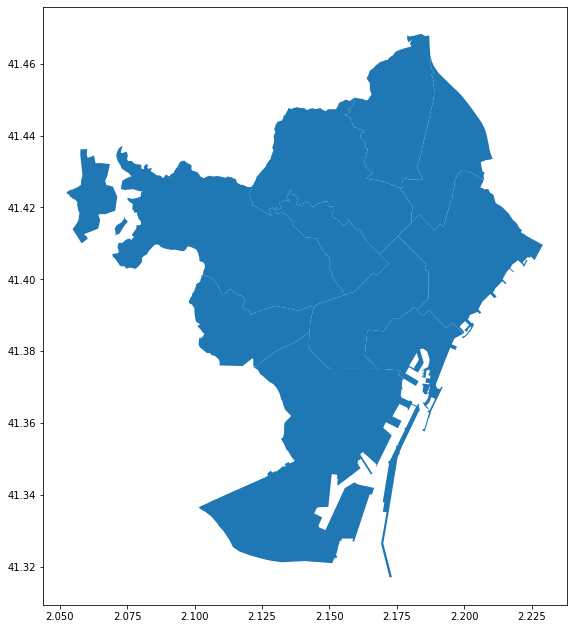

In [322]:
bcn_dist.plot(figsize=(15,11))

In [323]:
bcn_dist.shape

(10, 13)

In [324]:
pathfile='../data/0301100100_UNITATS_ADM_POLIGONS.json'
bcn = gpd.read_file(pathfile)

In [325]:
bcn.shape

(1501, 36)

In [326]:
# Set the Coordinate Referance System (crs) for projections
# ESPG code 4326 is also referred to as WGS84 lat-long projection
bcn.crs = {'init': 'epsg:4326'}


In [327]:
bcn.head()

,FID,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,...,CODI_UA,TIPUS_UA,NOM,WEB1,WEB2,WEB3,FHEX_COLOR,Shape_Leng,Shape_Area,geometry
0,0,01,Grup - I,0104,Unitats Administratives,010411,Terme Municipal,01041101,Terme Municipal,0104110101,...,080193,TERME,Barcelona,http://www.bcn.cat,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/document...,#000000,114036.624503,1.017050e+08,"MULTIPOLYGON (((432115.84760 4590999.09760, 43..."
1,1,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,...,01,DISTRICTE,Ciutat Vella,http://www.bcn.cat/ciutatvella,http://www.bcn.cat/estadistica/catala/dades/gu...,http://www.bcn.cat/estadistica/catala/document...,#000000,21366.961806,4.204931e+06,"POLYGON ((431733.73600 4582441.81600, 431645.0..."
2,2,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,...,02,DISTRICTE,Eixample,http://www.bcn.cat/eixample,http://www.bcn.cat/estadistica/catala/dades/gu...,http://www.bcn.cat/estadistica/catala/document...,#000000,13931.644175,7.464303e+06,"POLYGON ((432033.18360 4583665.03180, 432033.1..."
3,3,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,...,03,DISTRICTE,Sants-Montjuïc,http://www.bcn.cat/sants-montjuic,http://www.bcn.cat/estadistica/catala/dades/gu...,http://www.bcn.cat/estadistica/catala/document...,#000000,46711.856798,2.287985e+07,"MULTIPOLYGON (((428773.91130 4580873.74170, 42..."
4,4,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,...,04,DISTRICTE,Les Corts,http://www.bcn.cat/lescorts,http://www.bcn.cat/estadistica/catala/dades/gu...,http://www.bcn.cat/estadistica/catala/document...,#000000,12551.602001,6.010769e+06,"POLYGON ((425054.67010 4583672.56010, 425047.2..."


In [328]:
is_districte1=bcn['NOM'].isin(list_distr)
is_districte2=bcn['TIPUS_UA']=='DISTRICTE'
is_barri1=bcn['NOM'].isin(list_barri)
is_barri2=bcn['TIPUS_UA']=='BARRI'

In [329]:
distr_t=bcn[is_districte1]
distr=distr_t[is_districte2]

In [330]:
barri_t=bcn[is_barri1]
barri=barri_t[is_barri2]

In [331]:
distr.shape

(10, 36)

In [332]:
barri.shape

(72, 36)

In [333]:
barri.head()

,FID,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,...,CODI_UA,TIPUS_UA,NOM,WEB1,WEB2,WEB3,FHEX_COLOR,Shape_Leng,Shape_Area,geometry
11,11,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,...,01,BARRI,el Raval,http://lameva.barcelona.cat/ciutatvella/ca/hom...,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/document...,#E66900,5521.646549,1.100286e+06,"POLYGON ((430162.18750 4581936.98450, 430102.8..."
12,12,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,...,02,BARRI,el Barri Gòtic,http://lameva.barcelona.cat/ciutatvella/ca/hom...,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/document...,#E66900,5197.999887,8.155939e+05,"POLYGON ((431189.90750 4581851.44750, 431153.9..."
13,13,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,...,03,BARRI,la Barceloneta,http://lameva.barcelona.cat/ciutatvella/ca/hom...,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/document...,#E66900,13853.129525,1.179382e+06,"POLYGON ((432798.73410 4582081.25990, 432794.0..."
14,14,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,...,04,BARRI,"Sant Pere, Santa Caterina i la Ribera",http://lameva.barcelona.cat/ciutatvella/ca/hom...,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/document...,#E66900,4664.482949,1.109669e+06,"POLYGON ((431733.73600 4582441.81600, 431645.0..."
15,15,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,...,05,BARRI,el Fort Pienc,http://lameva.barcelona.cat/eixample/ca/home/e...,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/document...,#E66900,4137.328784,9.293558e+05,"POLYGON ((431741.81520 4582625.64910, 431771.9..."


In [334]:
distr.head()

,FID,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,...,CODI_UA,TIPUS_UA,NOM,WEB1,WEB2,WEB3,FHEX_COLOR,Shape_Leng,Shape_Area,geometry
1,1,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,...,01,DISTRICTE,Ciutat Vella,http://www.bcn.cat/ciutatvella,http://www.bcn.cat/estadistica/catala/dades/gu...,http://www.bcn.cat/estadistica/catala/document...,#000000,21366.961806,4.204931e+06,"POLYGON ((431733.73600 4582441.81600, 431645.0..."
2,2,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,...,02,DISTRICTE,Eixample,http://www.bcn.cat/eixample,http://www.bcn.cat/estadistica/catala/dades/gu...,http://www.bcn.cat/estadistica/catala/document...,#000000,13931.644175,7.464303e+06,"POLYGON ((432033.18360 4583665.03180, 432033.1..."
3,3,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,...,03,DISTRICTE,Sants-Montjuïc,http://www.bcn.cat/sants-montjuic,http://www.bcn.cat/estadistica/catala/dades/gu...,http://www.bcn.cat/estadistica/catala/document...,#000000,46711.856798,2.287985e+07,"MULTIPOLYGON (((428773.91130 4580873.74170, 42..."
4,4,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,...,04,DISTRICTE,Les Corts,http://www.bcn.cat/lescorts,http://www.bcn.cat/estadistica/catala/dades/gu...,http://www.bcn.cat/estadistica/catala/document...,#000000,12551.602001,6.010769e+06,"POLYGON ((425054.67010 4583672.56010, 425047.2..."
5,5,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,...,05,DISTRICTE,Sarrià-Sant Gervasi,http://www.bcn.cat/sarria-santgervasi,http://www.bcn.cat/estadistica/catala/dades/gu...,http://www.bcn.cat/estadistica/catala/document...,#000000,35757.402601,1.991557e+07,"MULTIPOLYGON (((422563.07100 4587486.74300, 42..."


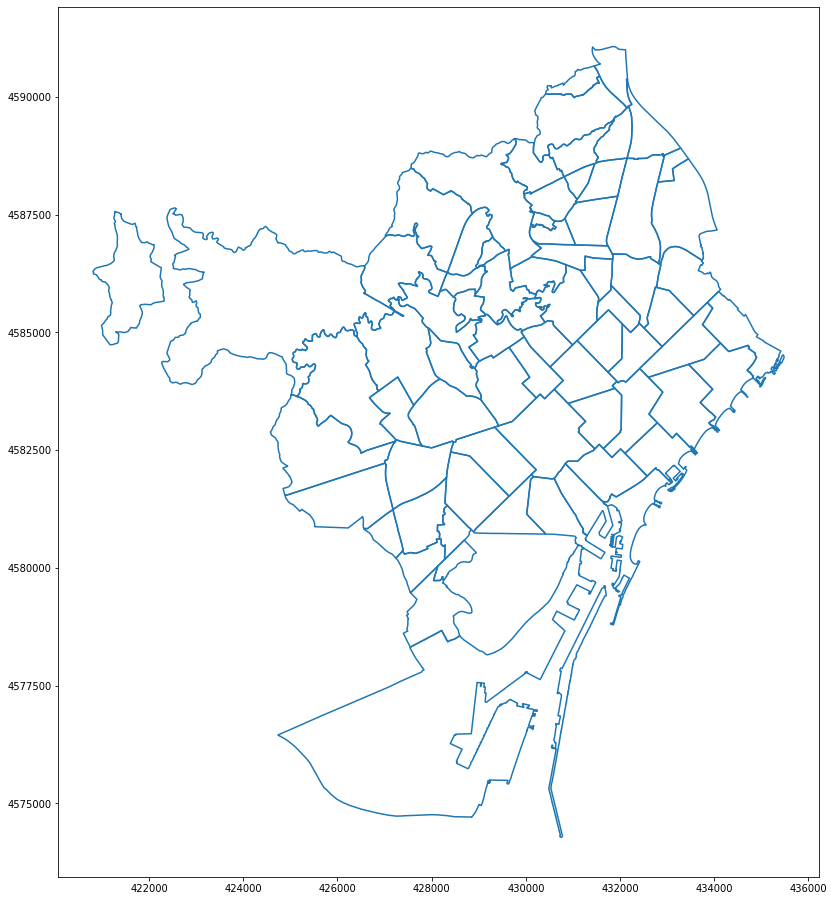

In [335]:
ax = barri["geometry"].boundary.plot(aspect=1,figsize=(20,16))

In [336]:
bcn_data = barri.merge(df, how="left", left_on=['NOM'], right_on=['Nom_Barri'])
print("Type of DataFrame : ", type(bcn_data), bcn_data.shape[0])
bcn_data.head()

Type of DataFrame :  <class 'geopandas.geodataframe.GeoDataFrame'> 2016


,FID,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,...,Shape_Area,geometry,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,11,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,...,1.100286e+06,"POLYGON ((430162.18750 4581936.98450, 430102.8...",2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,11,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,...,1.100286e+06,"POLYGON ((430162.18750 4581936.98450, 430102.8...",2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),12.8
2,11,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,...,1.100286e+06,"POLYGON ((430162.18750 4581936.98450, 430102.8...",2021,2,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),774.2
3,11,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,...,1.100286e+06,"POLYGON ((430162.18750 4581936.98450, 430102.8...",2021,2,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),12.9
4,11,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,...,1.100286e+06,"POLYGON ((430162.18750 4581936.98450, 430102.8...",2019,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),822.6


In [337]:
bcn_data['Lloguer_mitja'].unique().tolist()

['Lloguer mitjà mensual (Euros/mes)',
 'Lloguer mitjà per superfície (Euros/m2 mes)']

In [338]:
bcn_data=bcn_data[bcn_data['Lloguer_mitja']=='Lloguer mitjà mensual (Euros/mes)']

In [339]:
bcn_data.describe()

,FID,PERIMETRE,AREA,Shape_Leng,Shape_Area,Any,Trimestre,Codi_Districte,Codi_Barri,Preu
count,1008.000000,1008.000000,1.008000e+03,1008.000000,1.008000e+03,1008.000000,1008.000000,1008.000000,1008.000000,929.000000
mean,47.361111,5966.182875,1.348884e+06,5966.182846,1.348884e+06,2019.285714,2.357143,6.291667,37.361111,899.339182
std,21.002023,5842.755719,2.049596e+06,5842.755750,2.049596e+06,1.030669,1.109420,2.782455,21.002023,239.258124
min,11.000000,1921.971000,1.186849e+05,1921.970695,1.186849e+05,2018.000000,1.000000,1.000000,1.000000,350.500000
25%,29.750000,3463.705750,5.875910e+05,3463.705401,5.875910e+05,2018.000000,1.000000,4.000000,19.750000,751.160000
50%,47.500000,4610.681000,8.863497e+05,4610.680878,8.863497e+05,2019.000000,2.000000,7.000000,37.500000,842.100000
75%,65.250000,6318.286250,1.311847e+06,6318.286168,1.311847e+06,2020.000000,3.000000,8.000000,55.250000,982.500000
max,83.000000,42810.123000,1.423748e+07,42810.122788,1.423748e+07,2021.000000,4.000000,10.000000,73.000000,2023.400000


In [340]:
bcn_data.dtypes

FID                  int64
ID_ANNEX            object
ANNEXDESCR          object
ID_TEMA             object
TEMA_DESCR          object
ID_CONJUNT          object
CONJ_DESCR          object
ID_SUBCONJ          object
SCONJ_DESC          object
ID_ELEMENT          object
ELEM_DESCR          object
NIVELL              object
NDESCR_CA           object
NDESCR_ES           object
NDESCR_EN           object
TERME               object
DISTRICTE           object
BARRI               object
AEB                 object
SEC_CENS            object
GRANBARRI           object
ZUA                 object
AREA_I              object
LITERAL             object
PERIMETRE          float64
AREA               float64
CODI_UA             object
TIPUS_UA            object
NOM                 object
WEB1                object
WEB2                object
WEB3                object
FHEX_COLOR          object
Shape_Leng         float64
Shape_Area         float64
geometry          geometry
Any                  int64
T

In [341]:
os.chdir('../data')
os.getcwd()

'/Users/conchipalla/Documents/Professional Career 2020/My Jupiter Notebooks/Barcelona/data'

In [342]:
bcn_data.to_file("bcn_data.shp")

In [289]:
bcn_data['Any'].unique().tolist()

[2021, 2019, 2020, 2018]

In [290]:
year=2021

bcn_data=bcn_data[bcn_data['Any'] == year]

In [291]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [292]:
distr['centroid'] = distr.centroid
bcn_data['centroid'] = bcn_data.centroid

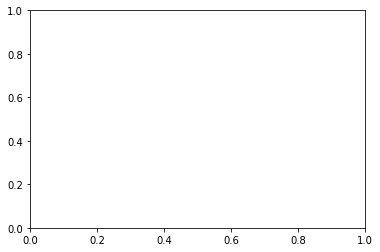

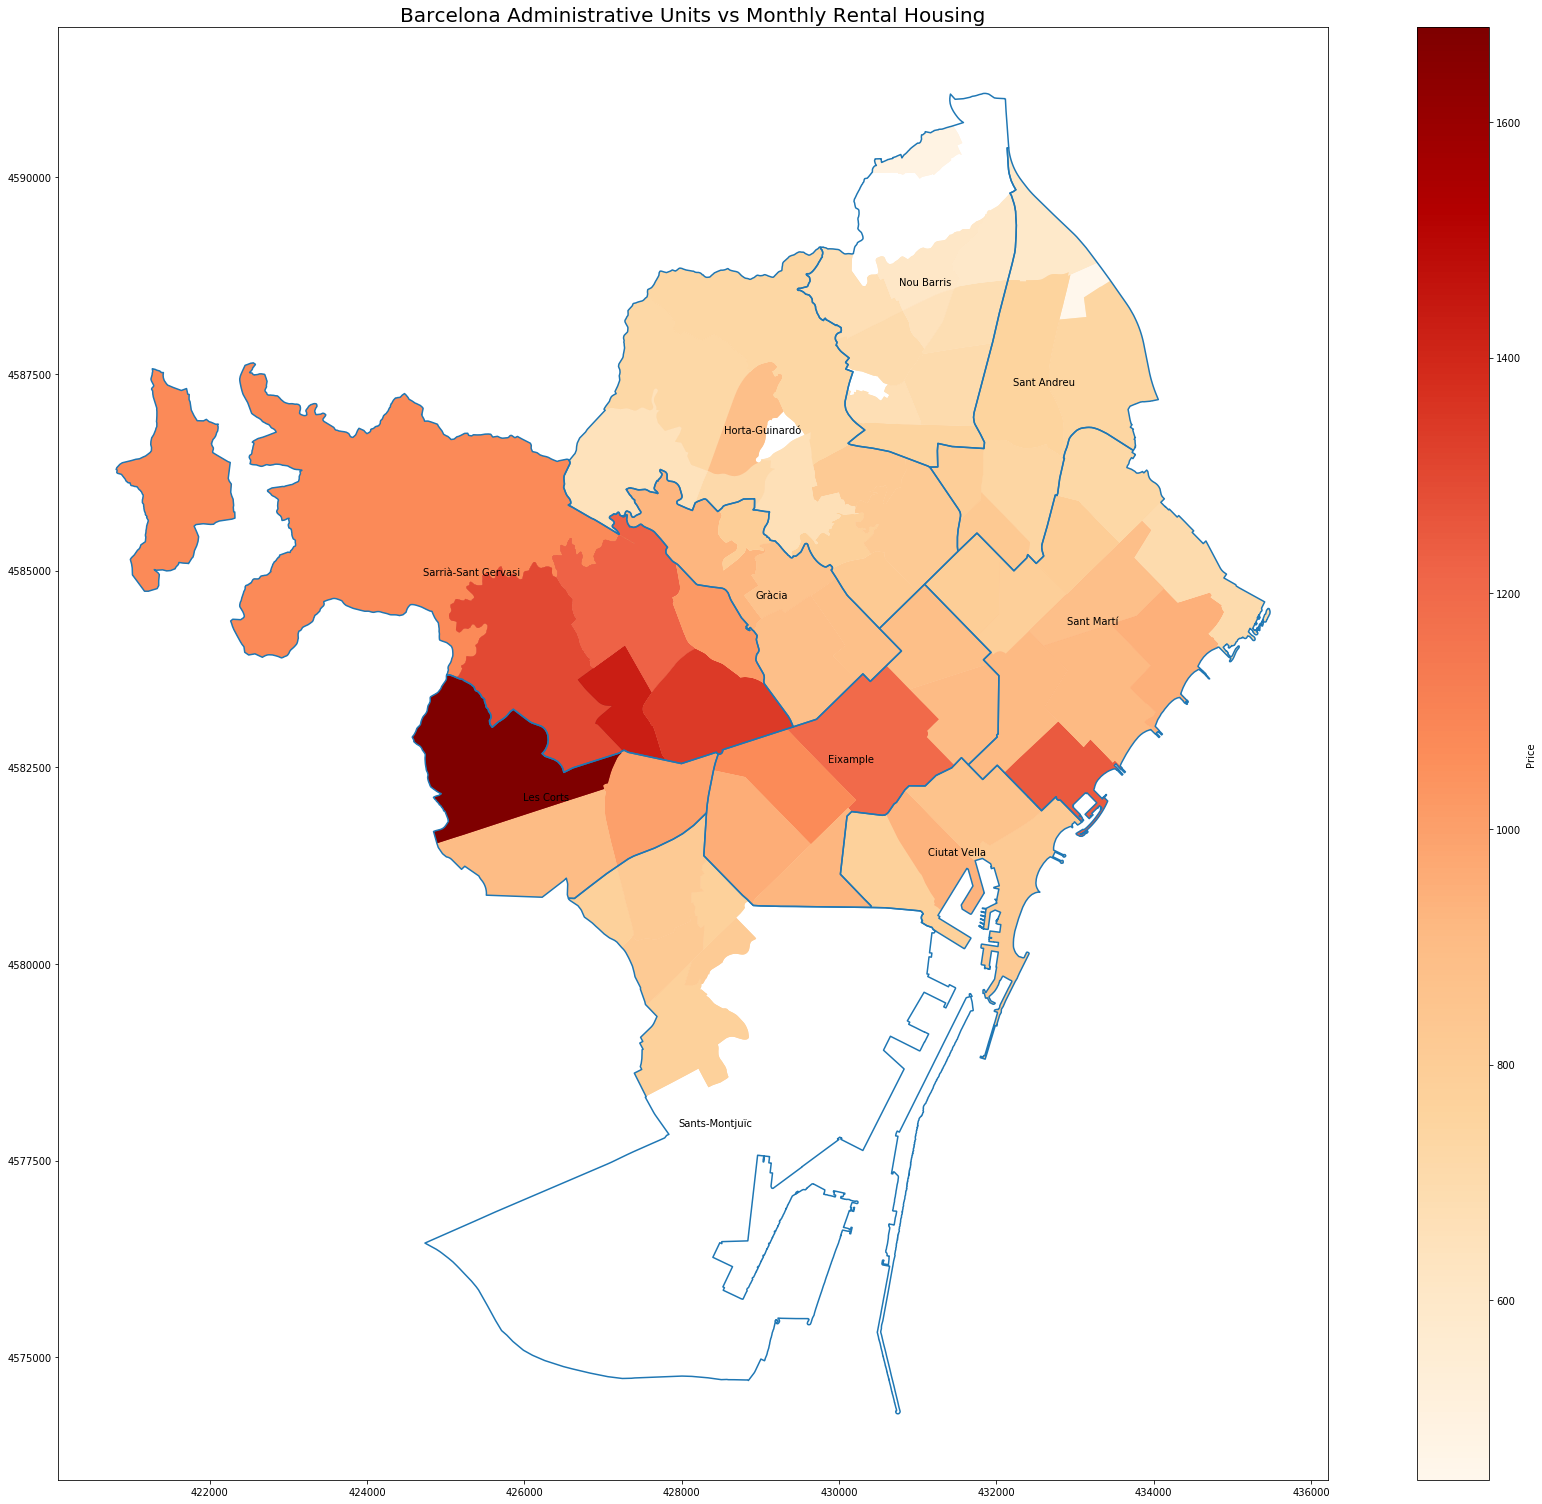

In [293]:
# Display a Choropleth map – Choropleth maps colour the regions/polygons in relation to a data variable.

fig, ax = plt.subplots(1, 1)
ax=distr["geometry"].boundary.plot(aspect=1,figsize=(25,21))
distr.apply(lambda x: ax.annotate(s=x['NOM'], xy=(x['centroid'].coords[0][0],x['centroid'].coords[0][1]-5), ha='center'), axis=1)
bcn_data.plot(column="Preu", ax=ax, cmap='OrRd',legend=True, legend_kwds={"label": "Price"},aspect=1)
ax.set_title('Barcelona Administrative Units vs Monthly Rental Housing', fontdict={'fontsize': 20}, loc='center');
plt.tight_layout()

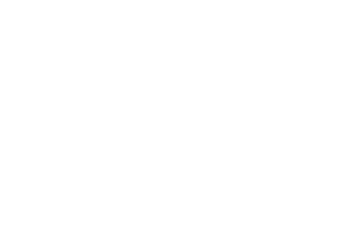

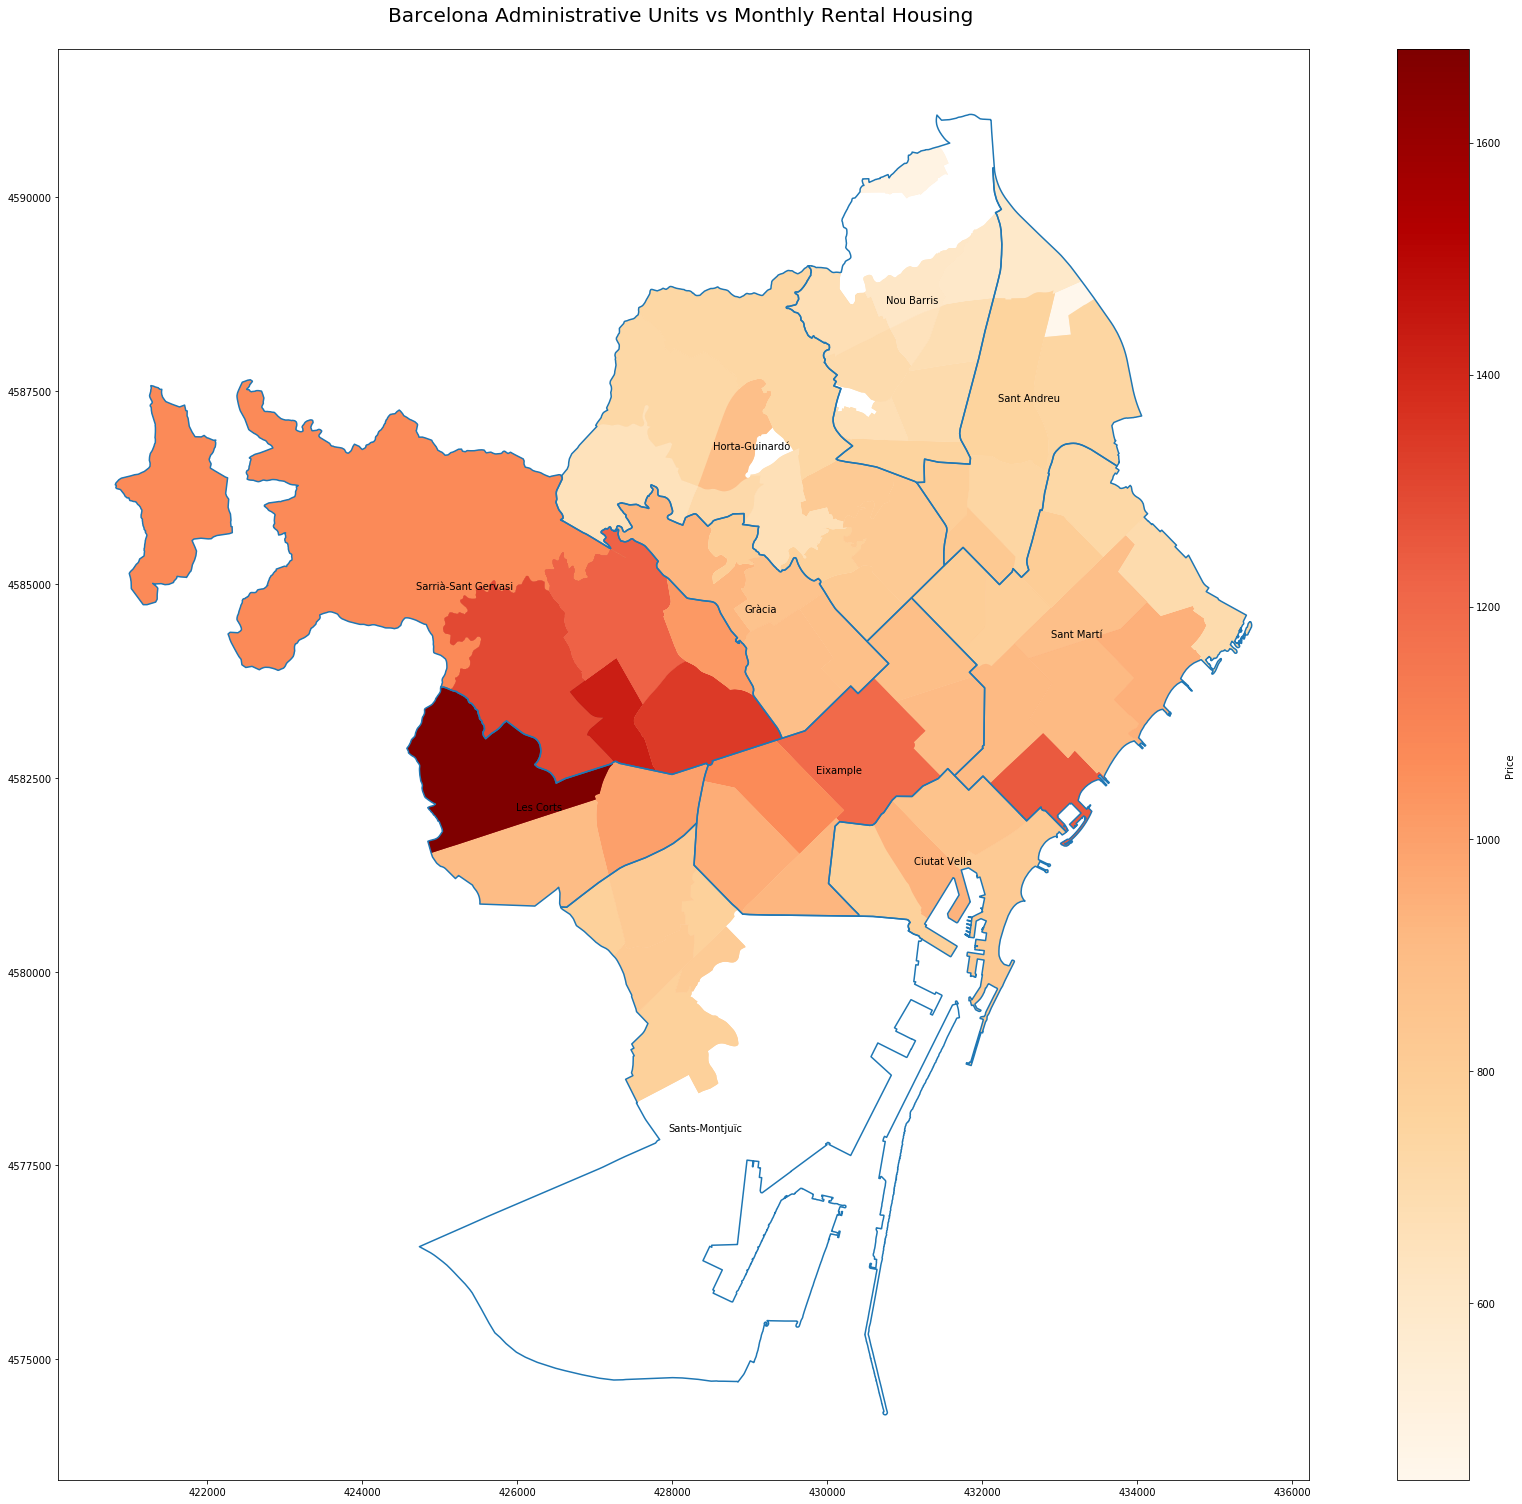

In [294]:
# Display a Choropleth map – Choropleth maps colour the regions/polygons in relation to a data variable.
# Ref: https://www.analyticsvidhya.com/blog/2021/09/how-to-visualise-data-in-maps-using-geopandas/
def init():
    fig,ax = plt.subplots()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax
ax = init()
ax=distr["geometry"].boundary.plot(aspect=1,figsize=(25,21))
#Layers plotting
distr.apply(lambda x: ax.annotate(s=x['NOM'], xy=(x['centroid'].coords[0][0],x['centroid'].coords[0][1]-5), ha='center'), axis=1)
bcn_data.plot(column="Preu", ax=ax, cmap='OrRd',legend=True, legend_kwds={"label": "Price"},aspect=1)
ax.set_title('Barcelona Administrative Units vs Monthly Rental Housing \n', fontdict={'fontsize': 20}, loc='center');
plt.tight_layout()

In [295]:
# Reference : https://realpython.com/pandas-groupby/
by_district = bcn_data.groupby(['Nom_Districte','Any'])['Preu'].mean()
by_district.reset_index()

,Nom_Districte,Any,Preu
0,Ciutat Vella,2021,845.287500
1,Eixample,2021,985.641667
2,Gràcia,2021,868.100000
3,Horta-Guinardó,2021,757.990000
4,Les Corts,2021,1183.283333
5,Nou Barris,2021,658.960000
6,Sant Andreu,2021,713.984615
7,Sant Martí,2021,886.680000
8,Sants-Montjuïc,2021,798.183333
9,Sarrià-Sant Gervasi,2021,1276.225000


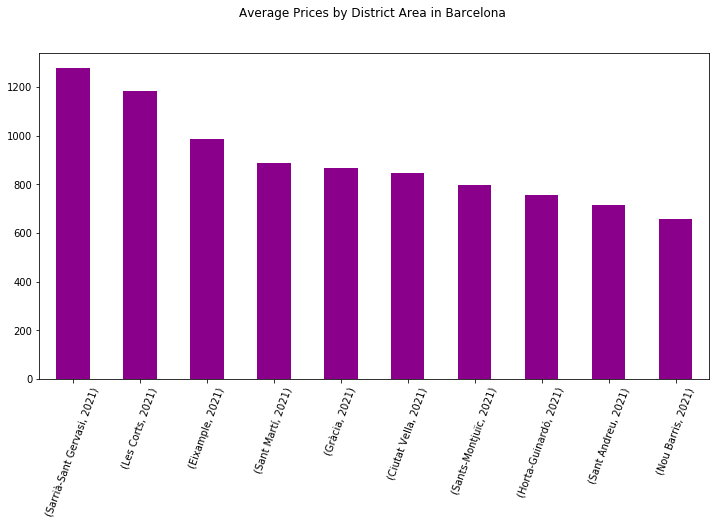

In [296]:
by_district.sort_values(ascending=False).plot(kind='bar',figsize=(12,6),\
                                                  title="Average Prices by District Area in Barcelona \n\n",\
                                                  color='darkmagenta')

plt.xticks(rotation=70)
plt.xlabel("")
plt.show()

In [297]:
SMI=950
bcn_data['percentSMI']=np.round((bcn_data['Preu'])/SMI*100,2)

In [298]:
bcn_data.head()

,FID,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,...,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu,centroid,percentSMI
0,11,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,...,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2,POINT (430633.40407 4581162.89267),79.92
2,11,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,...,2021,2,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),774.2,POINT (430633.40407 4581162.89267),81.49
28,12,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,...,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6,POINT (431210.63474 4581411.97552),97.85
30,12,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,...,2021,2,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),934.1,POINT (431210.63474 4581411.97552),98.33
56,13,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,...,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9,POINT (432280.19075 4581001.22014),85.15


In [299]:
bins = pd.cut(bcn_data['percentSMI'], bins=3, labels=("cool", "warm", "hot"))


In [300]:
df_temp = bcn_data.groupby(bins).Preu.mean().fillna(0).reset_index()

In [301]:

df_temp.rename({'Preu':'AvgPrice_ClusterpercentSMI'}, axis=1, inplace=True)
df_temp.head()

,percentSMI,AvgPrice_ClusterpercentSMI
0,cool,734.156250
1,warm,973.577273
2,hot,1449.788889


In [302]:
bcn_data['cluster_SMI']=pd.cut(bcn_data['percentSMI'], bins=3, labels=("cool", "warm", "hot"))

In [303]:
bcn_data.head()

,FID,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,...,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu,centroid,percentSMI,cluster_SMI
0,11,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,...,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2,POINT (430633.40407 4581162.89267),79.92,cool
2,11,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,...,2,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),774.2,POINT (430633.40407 4581162.89267),81.49,cool
28,12,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,...,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6,POINT (431210.63474 4581411.97552),97.85,warm
30,12,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,...,2,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),934.1,POINT (431210.63474 4581411.97552),98.33,warm
56,13,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,...,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9,POINT (432280.19075 4581001.22014),85.15,cool


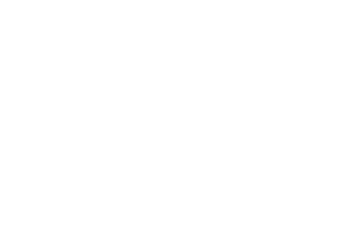

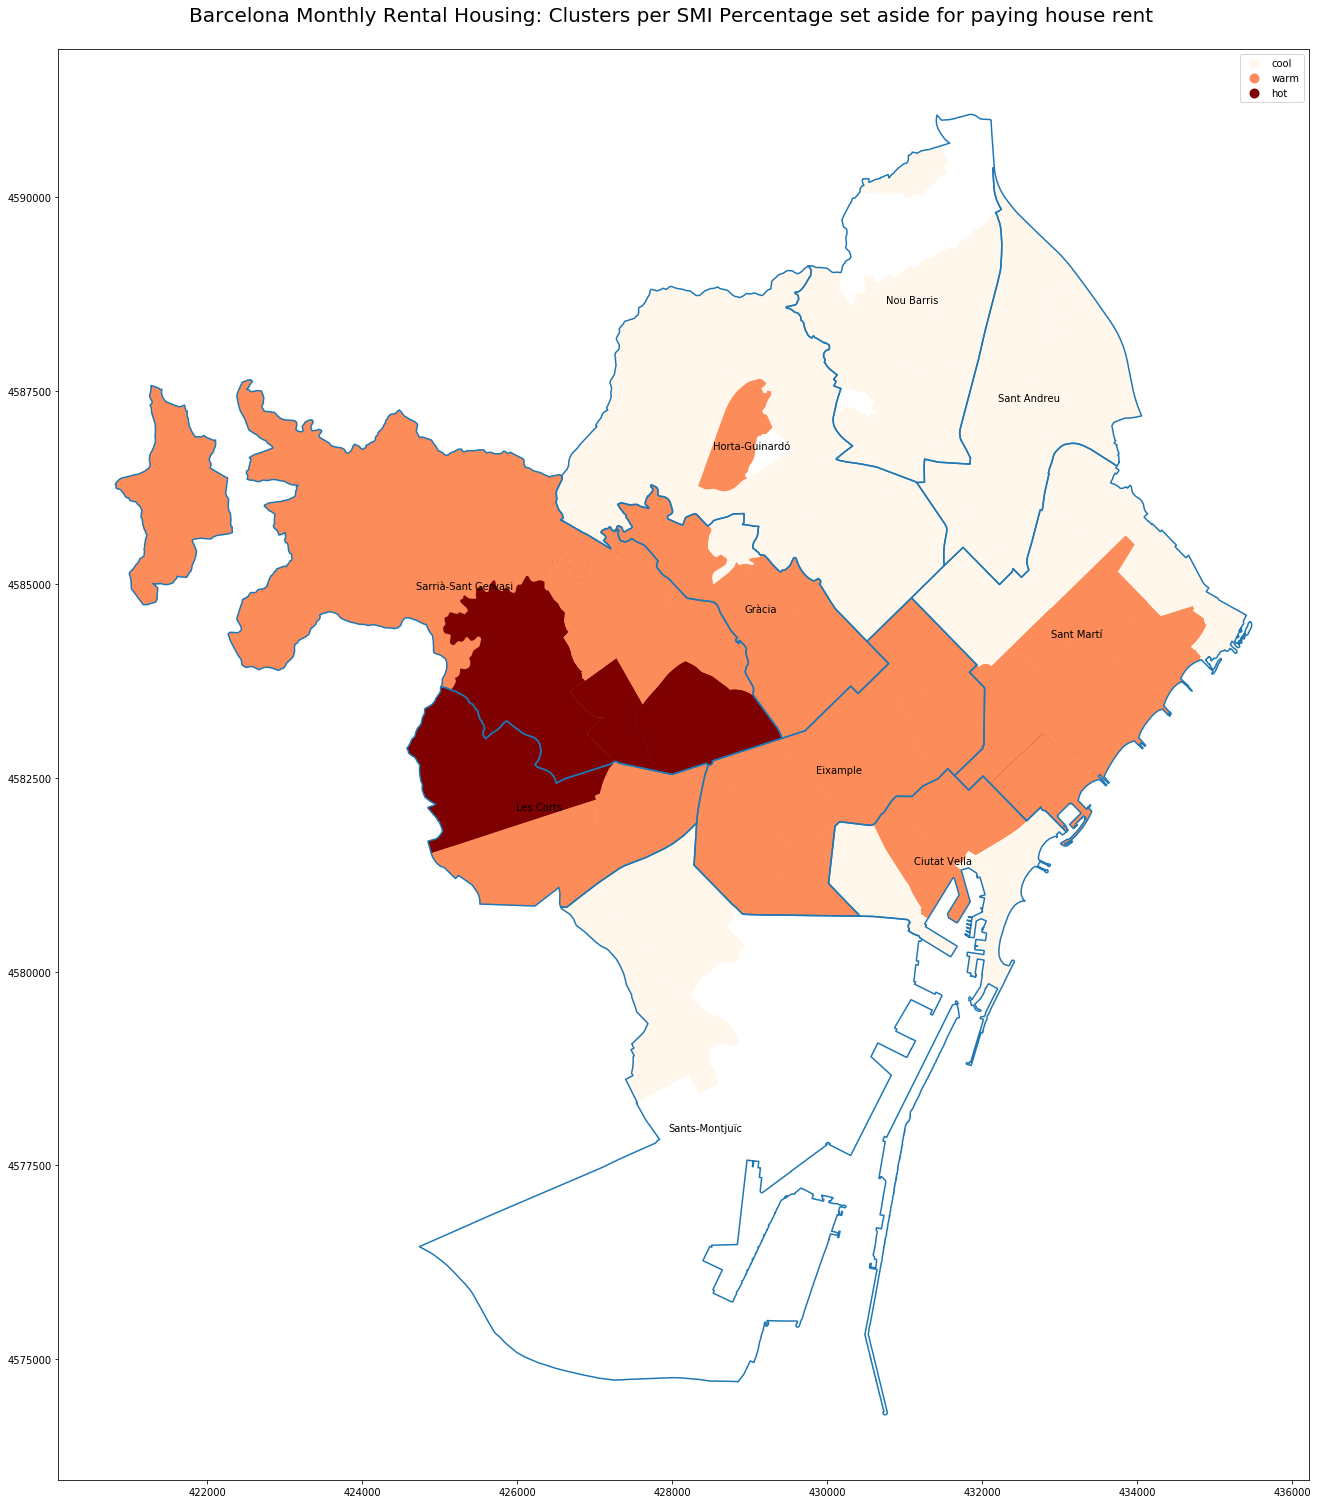

In [304]:
ax = init()
ax=distr["geometry"].boundary.plot(aspect=1,figsize=(25,21))
#Layers plotting
distr.apply(lambda x: ax.annotate(s=x['NOM'], xy=(x['centroid'].coords[0][0],x['centroid'].coords[0][1]-5), ha='center'), axis=1)
bcn_data.plot(column="cluster_SMI", ax=ax, cmap='OrRd',legend=True,aspect=1)
ax.set_title('Barcelona Monthly Rental Housing: Clusters per SMI Percentage set aside for paying house rent    \n', fontdict={'fontsize': 20}, loc='center')

plt.tight_layout()